In [2]:
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=4219ec7bdc0f344e7b321bfc9697d11261da8c5975c90af9420a4287d263daee
  Stored in directory: c:\users\sureksha\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Sureksha\\Downloads'

In [6]:
os.chdir('E:\\DS ASSIGNMENTS\\14.Decision Tree')

In [7]:
os.listdir()

['Company_Data.csv',
 'Fraud_check.csv',
 'problem statement(company data).txt',
 'Problem_statement(Fraudcheck).txt']

In [8]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [10]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
df.shape

(600, 6)

In [12]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [14]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [15]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# Outlier Check

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


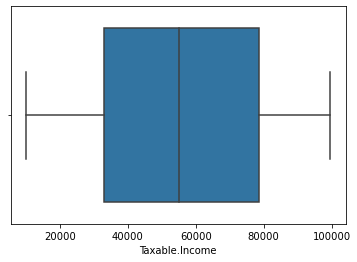

In [16]:
ax = sns.boxplot(df['Taxable.Income'])

# There are no outliers in the data

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


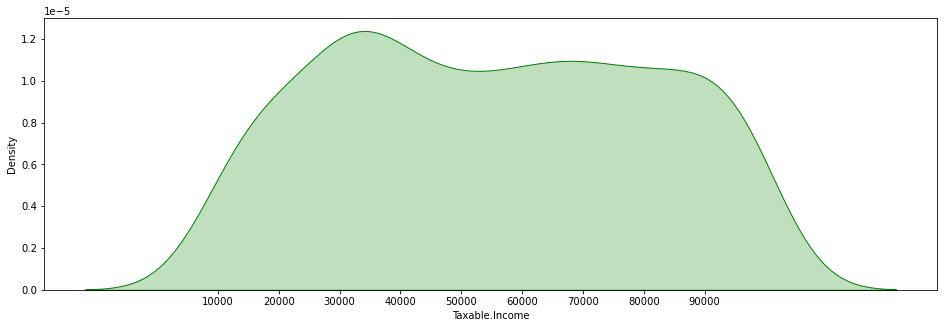

In [17]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

#The data is Skwed on the right
#The data has negative Kurtosis

In [18]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

NameError: name 'df1' is not defined

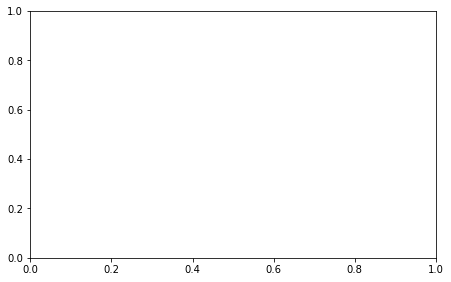

In [19]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [20]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

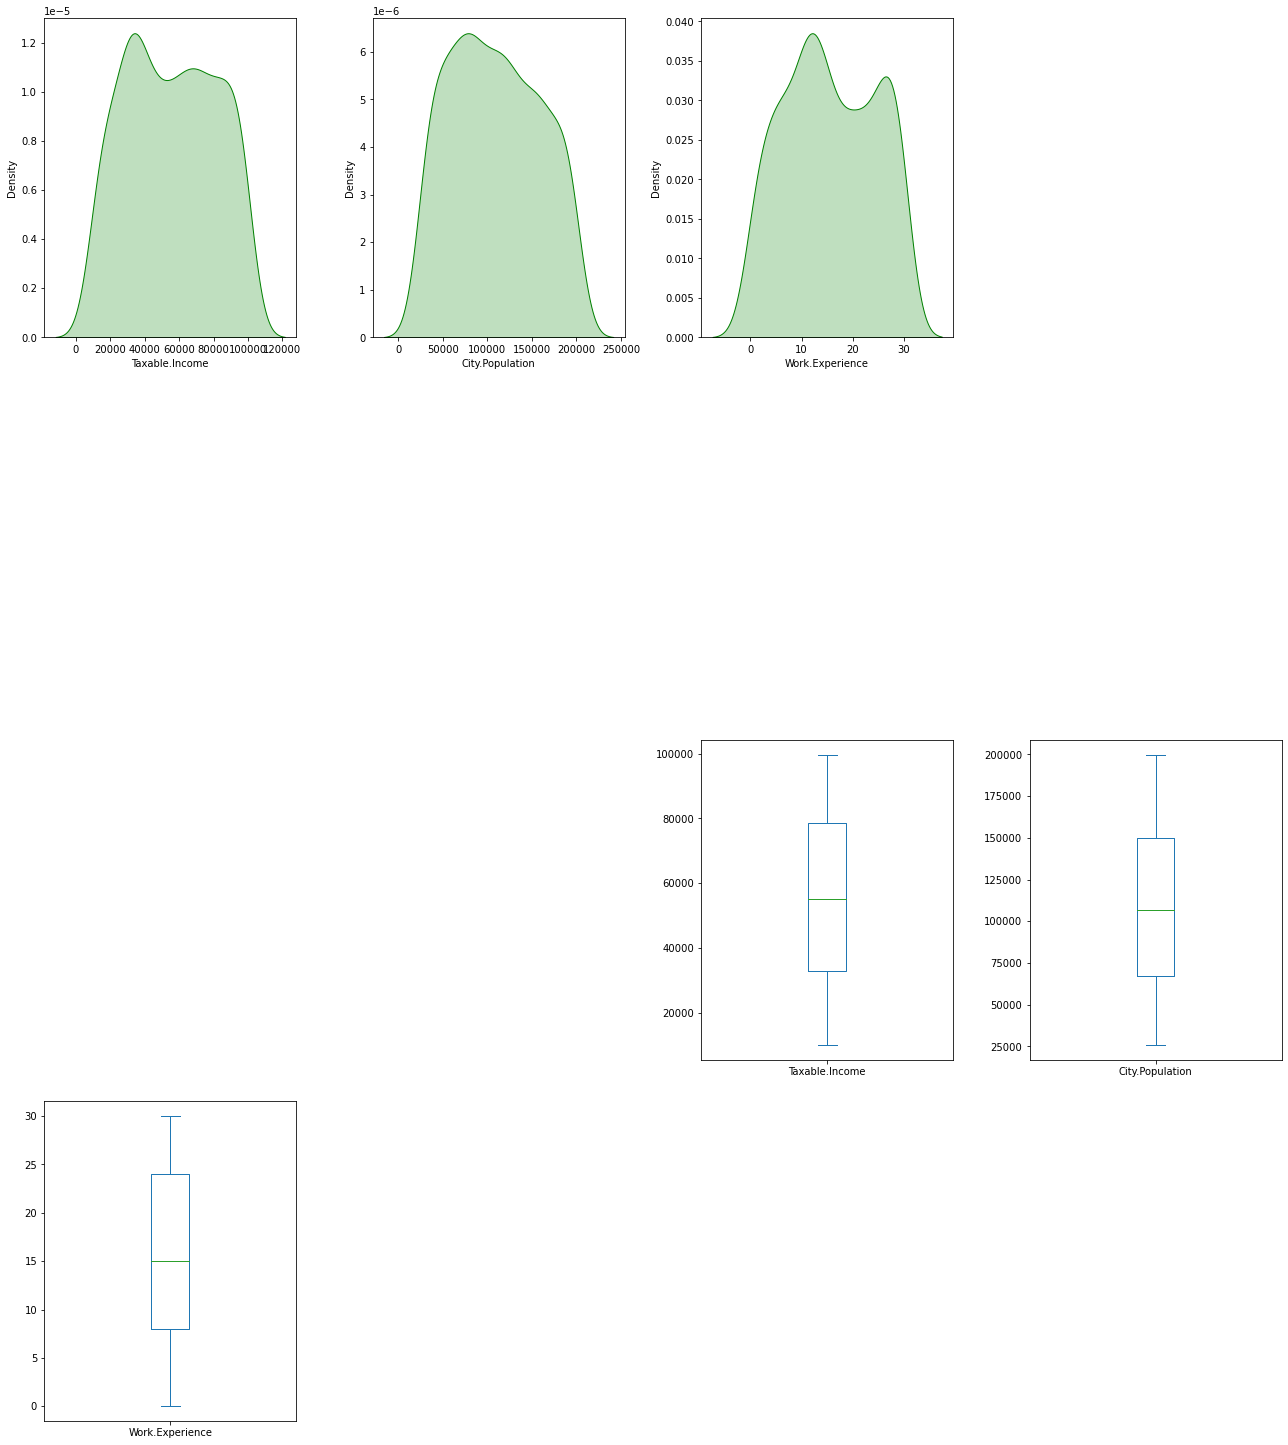

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [21]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [22]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [23]:
corr = df.corr()
corr

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628
City.Population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559
Undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267
Marital.Status_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014
Urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000


In [24]:
corr = df.corr()
corr

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628
City.Population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559
Undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267
Marital.Status_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014
Urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000


<AxesSubplot:>

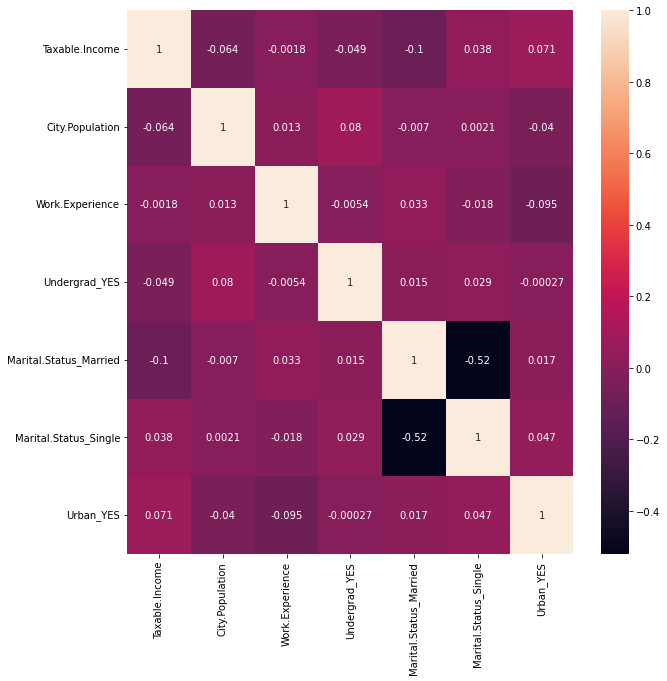

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [26]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

#Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [27]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


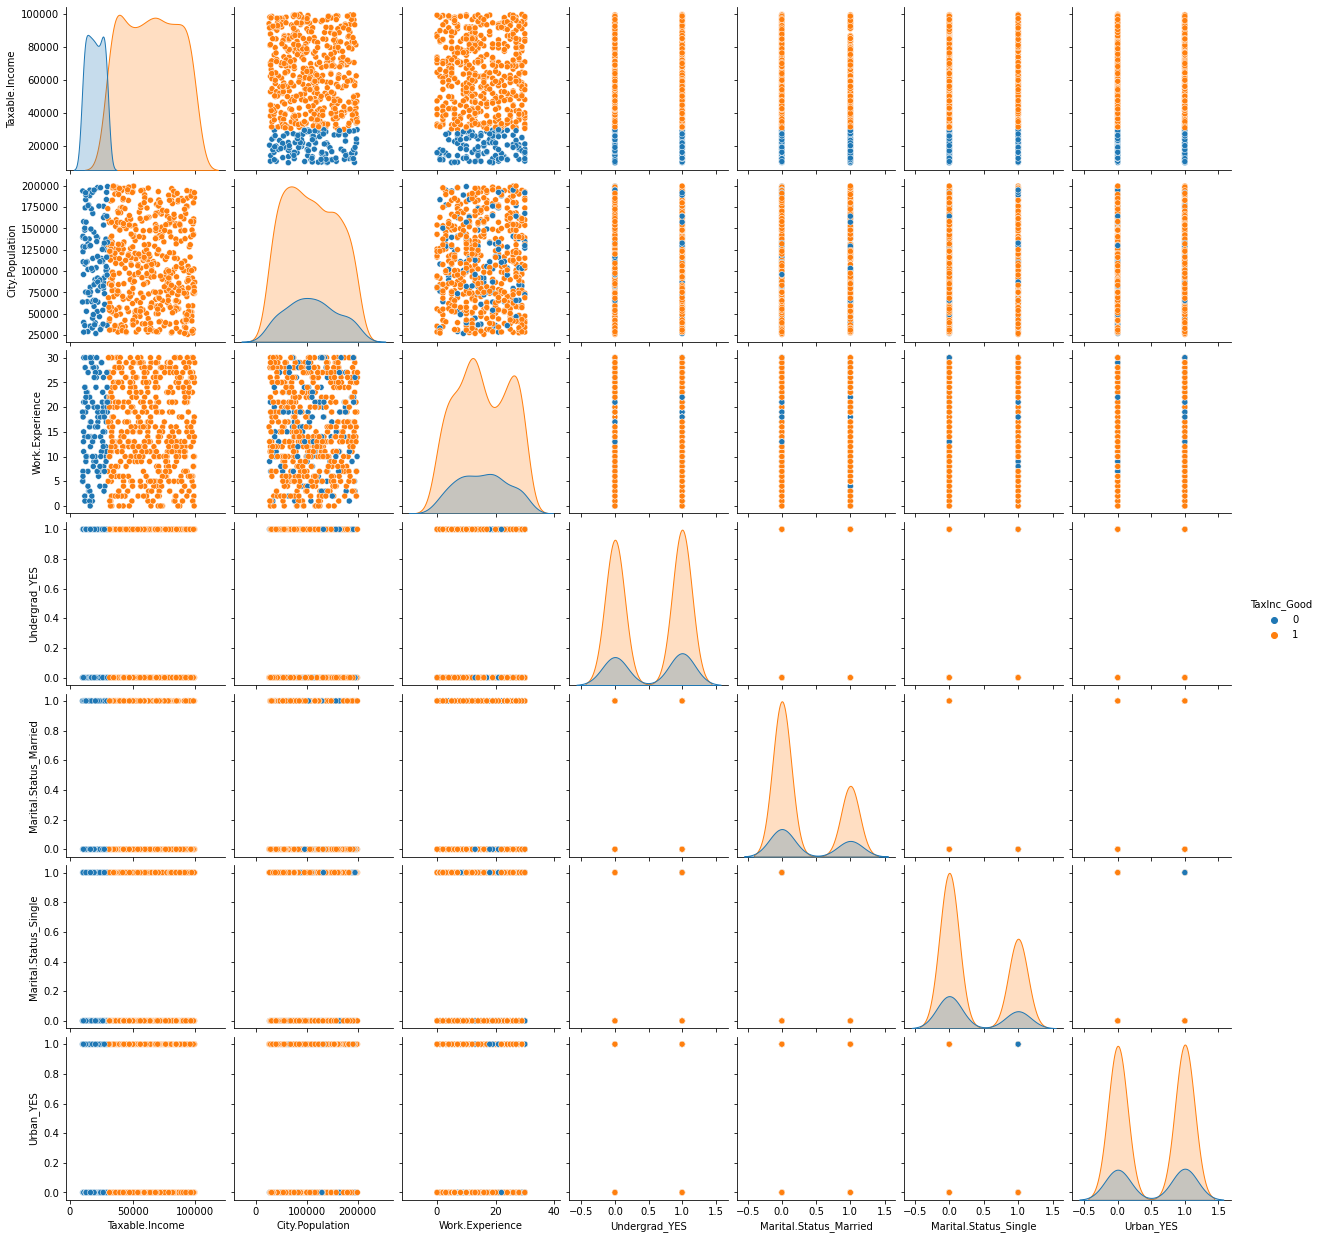

In [28]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [29]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [31]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [32]:
from sklearn.model_selection import train_test_split
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [34]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [35]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [36]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [37]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [38]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [40]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

C:\Users\Sureksha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [41]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

C:\Users\Sureksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [42]:
model.n_outputs_

1

In [43]:
model.oob_score_#Predictions on train data
prediction = model.predict(x_train)
prediction

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [44]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.9770833333333333

In [45]:
np.mean(prediction == y_train)

0.9770833333333333

In [46]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [47]:
##Prediction on test data
pred_test = model.predict(x_test)

In [48]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)

In [49]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [50]:
tree = model.estimators_[5]
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Building Decision Tree Classifier using Entropy Criteria

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

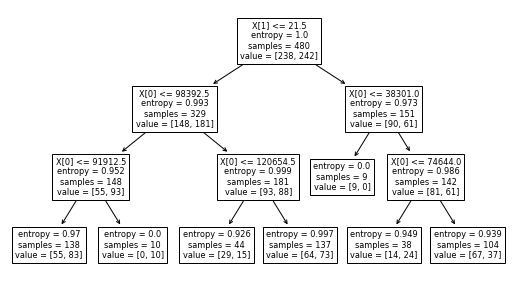

In [52]:
from sklearn import tree
#PLot the decision tree
tree.plot_tree(model);

In [53]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

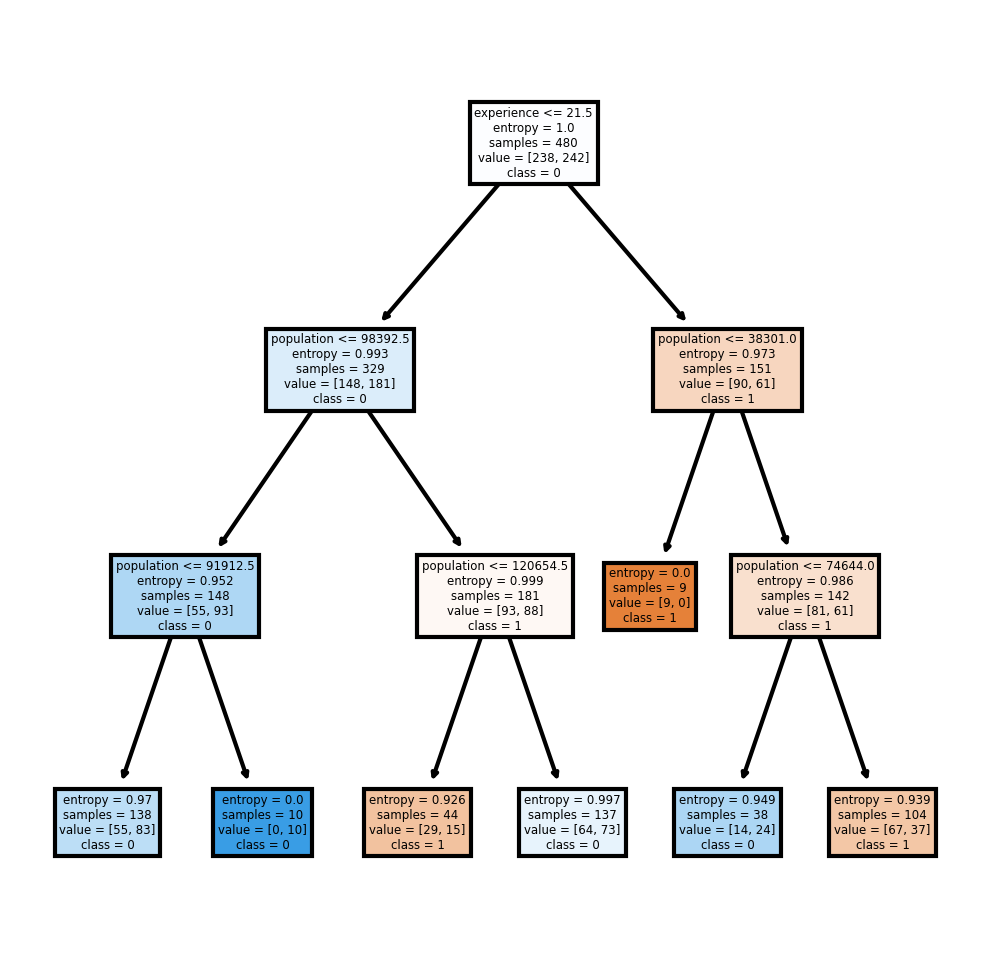

In [54]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [55]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    82
0    38
dtype: int64

In [56]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=uint8)

In [57]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,18,42
1,20,40


In [58]:
# Accuracy 
np.mean(preds==y_test)

0.48333333333333334

#Building Decision Tree Classifier (CART) using Gini Criteria

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Decision Tree Regression Example

In [61]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
array = df.values
X = array[:,0:3]
y = array[:,3]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [63]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [64]:
#Find the accuracy
model.score(X_test,y_test)

-0.8239272388059704

In [65]:
model.feature_importances_

array([0.67251046, 0.27223039, 0.05525915])